In [1]:
import pandas as pd
pd.set_option("display.max_columns", 1000)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
sns.set_style('ticks')

Matplotlib created a temporary cache directory at /scratch/naotok/3243018/matplotlib-4lg36uzd because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def metascape(metascape_path: str, output_path: str):
    
    # import metascape results
    metascape_df = pd.read_csv(

        metascape_path

    )
    
    # Summary GO
    metascape_summary_df = metascape_df[
        metascape_df['GroupID'].str.contains("Summary")
    ]

    # -Log
    metascape_summary_df['minus LogP'] = -metascape_summary_df['LogP']
    metascape_summary_df['minus LogQ'] = -metascape_summary_df['Log(q-value)']
    metascape_summary_df = metascape_summary_df.sort_values("minus LogP")

    # number of genes
    metascape_summary_df["n_genes"] = metascape_summary_df['InTerm_InList'].str.split("/", expand = True)[0].astype(int)
    
    # top 10
    metascape_summary_df = metascape_summary_df.tail(10)

    # scatter plot
    fig = plt.figure(figsize = (8, 3))
    ax = fig.add_subplot(111)

    ax = plt.scatter(

        data = metascape_summary_df,
        y = "Description",
        x = "minus LogP",
        c = metascape_summary_df['n_genes'],
        cmap = "plasma",
        edgecolor = "black",
        s = 80

    )

    cbar = plt.colorbar()
    cbar.set_label("Number of genes")

    plt.xlabel("-Log$_{10}$($\it{P}$)")
    plt.ylabel("")
    
    sns.despine()
    plt.tight_layout()

    plt.savefig(output_path, dpi = 1000)

# scRNA & eCLiP

/scratch/naotok/3243018/ipykernel_3057230/473110999.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metascape_summary_df['minus LogP'] = -metascape_summary_df['LogP']
/scratch/naotok/3243018/ipykernel_3057230/473110999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metascape_summary_df['minus LogQ'] = -metascape_summary_df['Log(q-value)']


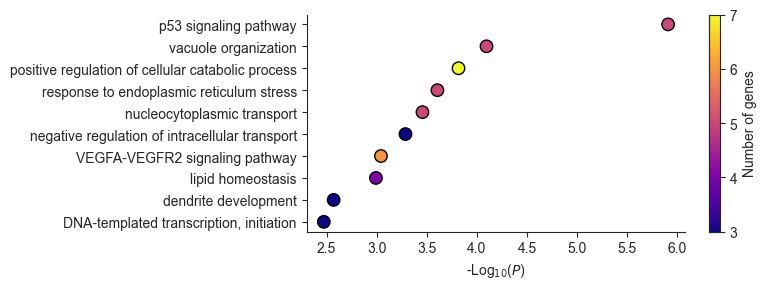

In [3]:
metascape(

    "/rhome/naotok/bigdata/Upf2_paper/metascape/scRNA_and_eCLiP_overlap.csv",
    "/rhome/naotok/Upf2_paper/figure/scRNA_and_eCLiP_overlap_metascape.png"
    
)

# bulk DEGs

/scratch/naotok/3243018/ipykernel_3057230/473110999.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metascape_summary_df['minus LogP'] = -metascape_summary_df['LogP']
/scratch/naotok/3243018/ipykernel_3057230/473110999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metascape_summary_df['minus LogQ'] = -metascape_summary_df['Log(q-value)']


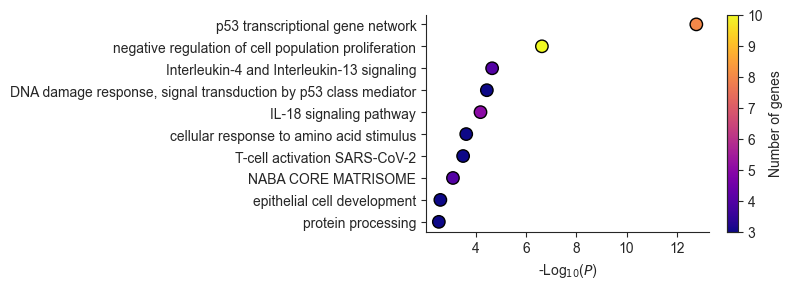

In [4]:
metascape(

    "/rhome/naotok/bigdata/Upf2_paper/metascape/Bulk_Upf2P53KO_rescued_genes.csv",
    "/rhome/naotok/Upf2_paper/figure/Bulk_Upf2P53KO_rescued_genes_metascape.png"
    
)